# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

<IPython.core.display.Javascript object>


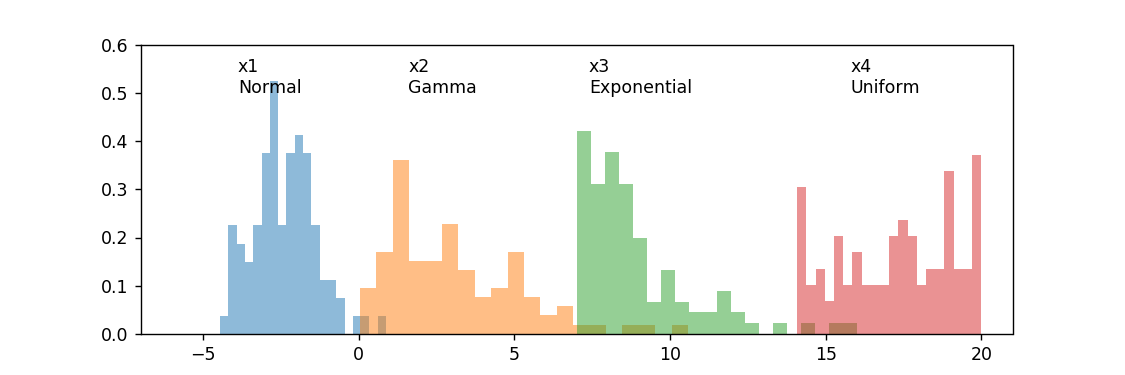

In [3]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 100)
x2 = np.random.gamma(2, 1.5, 100)
x3 = np.random.exponential(2, 100)+7
x4 = np.random.uniform(14,20, 100)

# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, normed=True, bins=20, alpha=0.5)
plt.hist(x2, normed=True, bins=20, alpha=0.5)
plt.hist(x3, normed=True, bins=20, alpha=0.5)
plt.hist(x4, normed=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

<IPython.core.display.Javascript object>


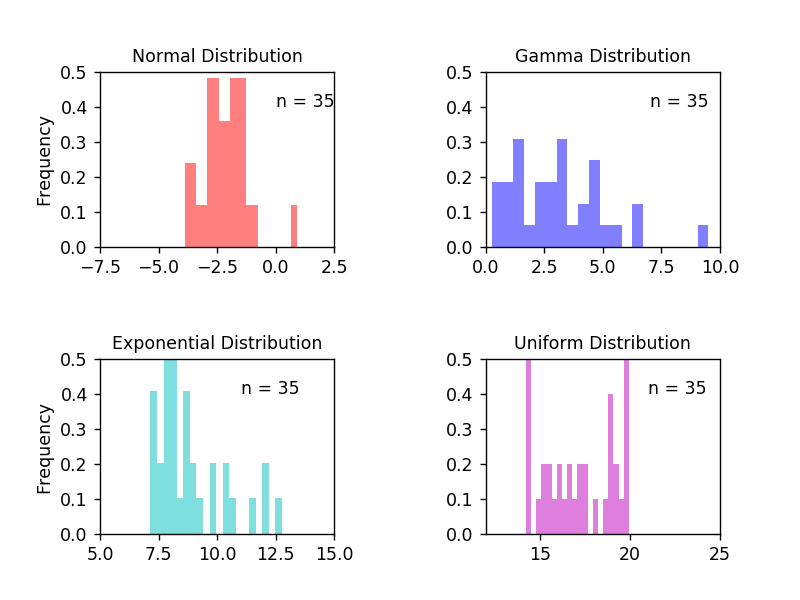

In [12]:
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation

fig = plt.figure()

gspec = gridspec.GridSpec(3, 3, width_ratios=[3,1,3],height_ratios=[3,1,3])
one = plt.subplot(gspec[0, 0])
two = plt.subplot(gspec[0, 2])
three = plt.subplot(gspec[2, 0])
four = plt.subplot(gspec[2, 2])

n = 100

def update(curr):
    if curr == n: 
        histogram.event_source.stop()
    one.cla()
    one.hist(x1[:curr], bins=20, normed = True, color = 'r', alpha = 0.5)
    one.axis([-7.5,2.5,0,0.5])
    one.set_title('Normal Distribution', fontsize = 10)
    one.set_ylabel('Frequency', fontsize = 10)
    one.annotate('n = {}'.format(curr), [0,0.4])
    
    two.cla()
    two.hist(x2[:curr], bins=20, normed = True, color = 'b', alpha = 0.5)
    two.axis([0,10,0,0.5])
    two.set_title('Gamma Distribution', fontsize = 10)
    two.annotate('n = {}'.format(curr), [7,0.4])

    three.cla()
    three.hist(x3[:curr], bins=20, normed = True, color = 'c', alpha = 0.5)
    three.axis([5,15,0,0.5])
    three.set_title('Exponential Distribution', fontsize = 10)
    three.set_ylabel('Frequency', fontsize = 10)
    three.annotate('n = {}'.format(curr), [11,0.4])

    four.cla()
    four.hist(x4[:curr], bins=20, normed = True, color = 'm', alpha = 0.5)
    four.axis([12,25,0,0.5])
    four.set_title('Uniform Distribution', fontsize = 10)
    four.annotate('n = {}'.format(curr), [21,0.4])
    
#plt.rcParams.update({'font.size': 8})

histogram = animation.FuncAnimation(fig, update, interval=100)
